In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_train=pd.read_csv(r'G:\销售预测kaggle\data\train.csv')

f:\python35\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


空值查看

In [8]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
Store            1017209 non-null int64
DayOfWeek        1017209 non-null int64
Date             1017209 non-null object
Sales            1017209 non-null int64
Customers        1017209 non-null int64
Open             1017209 non-null int64
Promo            1017209 non-null int64
StateHoliday     1017209 non-null object
SchoolHoliday    1017209 non-null int64
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


数据查看基本信息

In [9]:
data_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


Store 数据查看

In [14]:
data_train['Store'].unique()

array([   1,    2,    3, ..., 1113, 1114, 1115], dtype=int64)

DayOfWeek 数据查看

In [13]:
data_train['DayOfWeek'].unique()

array([5, 4, 3, 2, 1, 7, 6], dtype=int64)

Sales 分析

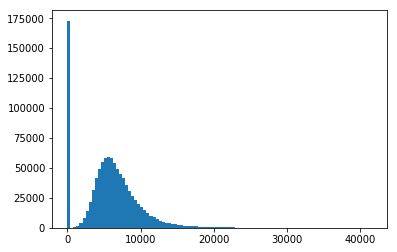

In [20]:
plt.hist(data_train['Sales'],bins=100)
plt.show()

Customer analysis

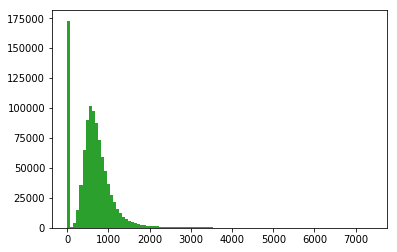

In [24]:
plt.hist(data_train['Customers'],bins=100)
plt.show()

open

In [27]:
data_train['Open'].value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [28]:
data_train['Promo'].value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

In [29]:
data_train['SchoolHoliday'].value_counts()

0    835488
1    181721
Name: SchoolHoliday, dtype: int64

In [32]:
data_train['Date'].min(),data_train['Date'].max()

('2013-01-01', '2015-07-31')

In [33]:
data_store=pd.read_csv(r'G:/销售预测kaggle/data/store.csv')

storetype

In [38]:
data_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
Store                        1115 non-null int64
StoreType                    1115 non-null object
Assortment                   1115 non-null object
CompetitionDistance          1112 non-null float64
CompetitionOpenSinceMonth    761 non-null float64
CompetitionOpenSinceYear     761 non-null float64
Promo2                       1115 non-null int64
Promo2SinceWeek              571 non-null float64
Promo2SinceYear              571 non-null float64
PromoInterval                571 non-null object
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [35]:
data_store['StoreType'].value_counts()

a    602
d    348
c    148
b     17
Name: StoreType, dtype: int64

In [39]:
data_store['Assortment'].value_counts()

a    593
c    513
b      9
Name: Assortment, dtype: int64

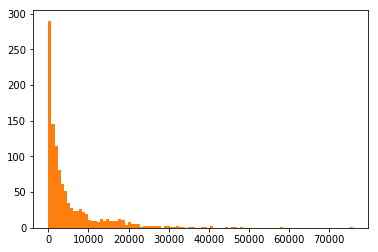

In [41]:
plt.hist(data_store['CompetitionDistance'][data_store['CompetitionDistance'].notnull()],bins=100)
plt.show()

In [45]:
data_store['Promo2'].value_counts()

1    571
0    544
Name: Promo2, dtype: int64

In [50]:
data_store['PromoInterval'].value_counts()

Jan,Apr,Jul,Oct     335
Feb,May,Aug,Nov     130
Mar,Jun,Sept,Dec    106
Name: PromoInterval, dtype: int64

In [51]:
data_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [52]:
data_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


合并数据，分析影响销量的主要因素

In [53]:
data=data_train.merge(data_store, on='Store')

In [54]:
data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


1，dayof week 对销量的影响。

In [57]:
data.groupby('DayOfWeek')['Sales'].sum()

DayOfWeek
1    1130203012
2    1020411930
3     954962863
4     911177709
5     980555941
6     846317735
7      29551433
Name: Sales, dtype: int64

In [64]:
f, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(x="DayOfWeek", y="Sales", data=data);

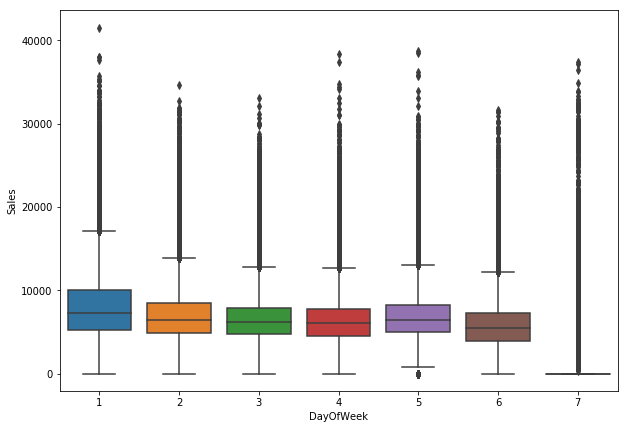

In [65]:
plt.show()

 Storetype 对销量的影响

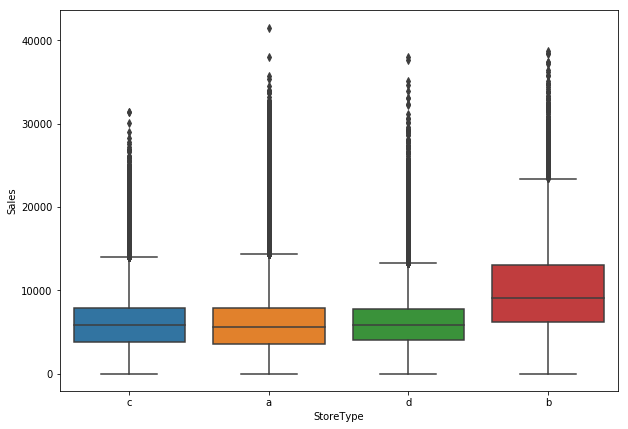

In [70]:
f, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(x="StoreType", y="Sales", data=data)
plt.show()

年份，月份，日期对销量的影响

In [83]:
data['year']=data['Date'].str[:4]
data['month']=data['Date'].str[5:7]
data['day'] = data['Date'].str[-2:]

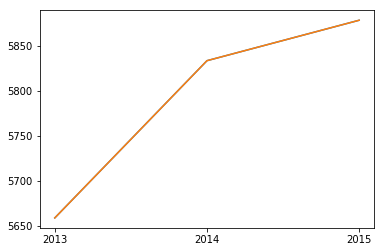

In [88]:
plt.plot(data.groupby('year')['Sales'].mean())
plt.show()

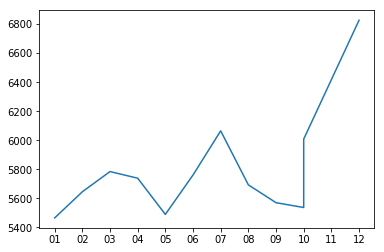

In [89]:
plt.plot(data.groupby('month')['Sales'].mean())
plt.show()

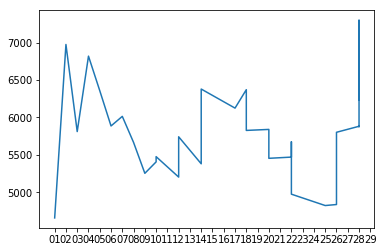

In [90]:
plt.plot(data.groupby('day')['Sales'].mean())
plt.show()

促销对销量的影响

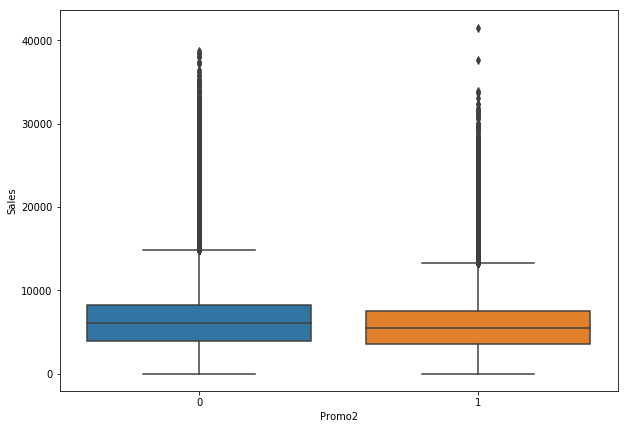

In [97]:
f, ax = plt.subplots(figsize=(10, 7))
sns.boxplot(x="Promo2", y="Sales", data=data)
plt.show()

In [112]:
def competition_day(df):
    try:
        return str(int(df['CompetitionOpenSinceYear']))+str(int(df['CompetitionOpenSinceMonth'])).zfill(2)
    except:
        return np.nan
    
data['Competition_start_month']=data.apply(competition_day,axis=1)

In [117]:
data['Competition_start_month']=pd.to_datetime(data['Competition_start_month'],format= '%Y%m')

In [120]:
data['Date']=pd.to_datetime(data['Date'],format='%Y-%m-%d')

In [125]:
len(data[data['Competition_start_month']>data['Date']]['Store'].unique())

191

In [140]:
train_store=data.copy()
fig, ax = plt.subplots(1,3,figsize=(18,4))
train_store[train_store['Promo'] ==1].groupby(['Promo2','StoreType'])['Sales'].mean().unstack().plot(ax =ax[1],kind = 'bar')

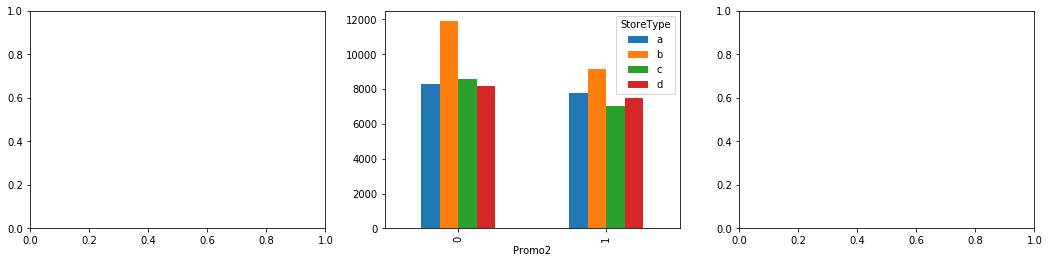

In [141]:
plt.show()